<div style="background-color: #1f407a;padding:1rem;">
<img src="images/ethz_logo.svg" />
</div>
<p style="color:#1f407a;padding:1rem;margin:0; text-align:center; font-size: 2rem; font-weight: 600;">
401-3901-00L Mathematical Optimization HS2020
</p>
<p style="color:#1f407a;margin: 0; text-align:center; font-size: 1.25rem">Problem set 2, Problemm 1: Finding Chebychev center of a polyhedron</p>
<div style="text-align: center; color:#1f407a">Pascal Lüscher</div>

Polytope defined as

$- x_1 + x_2 \leq 0$

$x_1 + x_2 \leq 8$

$x_1 \geq 0$

$x_2 \geq 0$

$x_1,x_2 \in R$



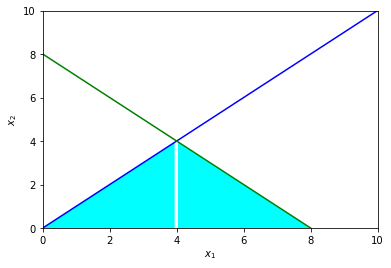

In [63]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, (ax) = plt.subplots(1, 1)

A = np.linspace(0, 10, 100)

a_1 = A
a_2 = - A + 8
ax.plot(A, a_1, color = 'blue')
ax.plot(A, a_2, color = 'green')
ax.fill_between(A, a_2, 100*[0], where=a_1-a_2>=0, facecolor='cyan', interpolate = True)
ax.fill_between(A, a_1, 100*[0], where=a_1-a_2<=0, facecolor='cyan', interpolate = True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

axis = plt.gca()
axis.set_xlim([0,10])
axis.set_ylim([0,10])
plt.show()

In [82]:
import pulp as p
import math

problem = p.LpProblem("Chebychev", p.LpMaximize)
y = [p.LpVariable(f"y_{i}",0) for i in range(2)]
r = p.LpVariable("r")

problem += r


# v_1 = (-1, 1), unit = (-1/sqrt(2), 1/sqrt(2))
problem += -(y[0] + (-1 / math.sqrt(2)) * r) + (y[1] + (1 / math.sqrt(2)) * r) <= 0
# v_2 = (1, 1), unit = (1/sqrt(2), 1/sqrt(2))
problem += (y[0] + (1 / math.sqrt(2)) * r) + y[1] + (1 / math.sqrt(2)) * r <= 8
# x_1 >= 0
problem += y[0] >= r
problem += y[1] >= r

status = problem.solve()
print("---")
print(f"Solved problem state: {p.LpStatus[status]}")
print(f"Objective: {problem.objective.value()}")
print(f"y: {y[0].value()} {y[1].value()}")
print(f"r: {r.value()}")
print("---")

---
Solved problem state: Optimal
Objective: 1.65685
y: 4.0 1.65685
r: 1.65685
---


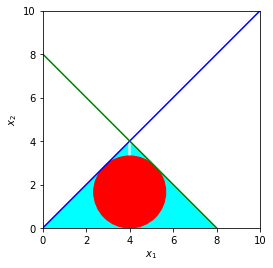

In [83]:
fig, (ax) = plt.subplots(1, 1)

A = np.linspace(0, 10, 100)
a_1 = A
a_2 = - A + 8
ax.plot(A, a_1, color = 'blue')
ax.plot(A, a_2, color = 'green')
ax.fill_between(A, a_2, 100*[0], where=a_1-a_2>=0, facecolor='cyan', interpolate = True)
ax.fill_between(A, a_1, 100*[0], where=a_1-a_2<=0, facecolor='cyan', interpolate = True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
circle = plt.Circle((y[0].value(), y[1].value()), r.value(), color='red')
ax.add_artist(circle)
axis = plt.gca()
axis.set_aspect('equal', adjustable='box')
axis.set_xlim([0,10])
axis.set_ylim([0,10])
plt.show()